# Import Libraries

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Dataset

In [5]:
df = pd.read_csv('ad_campaign_performance.csv')
df

,Campaign_ID,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
0,CAMP-XAJI0Y,15895,39,Instagram,Video,35-44,Female,US,48297,2116,303.850267,0.329109,4.381225,1
1,CAMP-6DPBHS,960,8,LinkedIn,Video,45-54,Female,UK,15097,2340,1572.604167,0.063589,15.499768,1
2,CAMP-AHXTHV,38258,54,YouTube,Image,35-44,All,US,8134,2740,21.260913,4.703467,33.685763,1
3,CAMP-3A3ZMF,44832,28,Facebook,Text,25-34,Female,US,21801,4277,48.628212,2.056419,19.618366,1
4,CAMP-8MDD4V,11384,36,Google,Story,18-24,All,UK,16503,1488,144.966620,0.689814,9.016542,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CAMP-4RX6PR,15828,13,YouTube,Carousel,18-24,All,US,20836,3524,131.640131,0.759647,16.913035,1
996,CAMP-YIEJ9C,23375,60,Instagram,Story,55+,Male,India,44615,1764,190.866310,0.523927,3.953827,1
997,CAMP-0UU5WR,6838,25,YouTube,Story,35-44,Female,UK,20233,3292,295.890611,0.337963,16.270449,1
998,CAMP-YESU4F,16013,28,Google,Image,55+,All,India,49820,2489,311.122213,0.321417,4.995986,1


## Check The Data

In [9]:
df.head()

,Campaign_ID,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
0,CAMP-XAJI0Y,15895,39,Instagram,Video,35-44,Female,US,48297,2116,303.850267,0.329109,4.381225,1
1,CAMP-6DPBHS,960,8,LinkedIn,Video,45-54,Female,UK,15097,2340,1572.604167,0.063589,15.499768,1
2,CAMP-AHXTHV,38258,54,YouTube,Image,35-44,All,US,8134,2740,21.260913,4.703467,33.685763,1
3,CAMP-3A3ZMF,44832,28,Facebook,Text,25-34,Female,US,21801,4277,48.628212,2.056419,19.618366,1
4,CAMP-8MDD4V,11384,36,Google,Story,18-24,All,UK,16503,1488,144.966620,0.689814,9.016542,1


In [13]:
df.shape

(1000, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      1000 non-null   object 
 1   Budget           1000 non-null   int64  
 2   Duration         1000 non-null   int64  
 3   Platform         1000 non-null   object 
 4   Content_Type     1000 non-null   object 
 5   Target_Age       1000 non-null   object 
 6   Target_Gender    1000 non-null   object 
 7   Region           1000 non-null   object 
 8   Clicks           1000 non-null   int64  
 9   Conversions      1000 non-null   int64  
 10  CTR              1000 non-null   float64
 11  CPC              1000 non-null   float64
 12  Conversion_Rate  1000 non-null   float64
 13  Success          1000 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 109.5+ KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Budget,1000.0,24592.139000,14632.696566,109.000000,11480.000000,23965.000000,37953.750000,49950.000000
Duration,1000.0,31.692000,16.542999,3.000000,17.000000,32.000000,46.000000,60.000000
Clicks,1000.0,25130.927000,14205.447930,98.000000,13225.250000,25013.500000,37386.500000,49820.000000
Conversions,1000.0,2480.360000,1449.470849,13.000000,1222.750000,2407.000000,3771.250000,4995.000000
CTR,1000.0,388.988301,1544.579703,0.232358,52.635433,102.213286,213.586455,31711.612903
CPC,1000.0,2.968978,15.660721,0.003153,0.468196,0.978351,1.899861,430.370690
Conversion_Rate,1000.0,26.856985,88.893199,0.036164,4.889723,9.847713,18.757727,1554.121864
Success,1000.0,0.897000,0.304111,0.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df.sample

<bound method NDFrame.sample of      Campaign_ID  Budget  Duration   Platform Content_Type Target_Age  \
0    CAMP-XAJI0Y   15895        39  Instagram        Video      35-44   
1    CAMP-6DPBHS     960         8   LinkedIn        Video      45-54   
2    CAMP-AHXTHV   38258        54    YouTube        Image      35-44   
3    CAMP-3A3ZMF   44832        28   Facebook         Text      25-34   
4    CAMP-8MDD4V   11384        36     Google        Story      18-24   
..           ...     ...       ...        ...          ...        ...   
995  CAMP-4RX6PR   15828        13    YouTube     Carousel      18-24   
996  CAMP-YIEJ9C   23375        60  Instagram        Story        55+   
997  CAMP-0UU5WR    6838        25    YouTube        Story      35-44   
998  CAMP-YESU4F   16013        28     Google        Image        55+   
999  CAMP-CL5EFJ   35340        36    YouTube        Story      18-24   

    Target_Gender Region  Clicks  Conversions          CTR        CPC  \
0          Female 

In [21]:
df.nunique()

Campaign_ID        1000
Budget              992
Duration             58
Platform              5
Content_Type          5
Target_Age            5
Target_Gender         3
Region                5
Clicks              989
Conversions         901
CTR                1000
CPC                1000
Conversion_Rate    1000
Success               2
dtype: int64

## Exploratory Data Analysis

In [114]:
df['Platform'].unique()

array(['Instagram', 'LinkedIn', 'YouTube', 'Facebook', 'Google'],
      dtype=object)

In [116]:
df['Content_Type'].unique()

array(['Video', 'Image', 'Text', 'Story', 'Carousel'], dtype=object)

In [118]:
df['Target_Gender'].unique()

array(['Female', 'All', 'Male'], dtype=object)

In [120]:
df['Region'].unique()

array(['US', 'UK', 'Germany', 'India', 'Canada'], dtype=object)

In [26]:
df.isna().sum()

Campaign_ID        0
Budget             0
Duration           0
Platform           0
Content_Type       0
Target_Age         0
Target_Gender      0
Region             0
Clicks             0
Conversions        0
CTR                0
CPC                0
Conversion_Rate    0
Success            0
dtype: int64

## Visualization

### 1. Click-Through-Rate By Platform

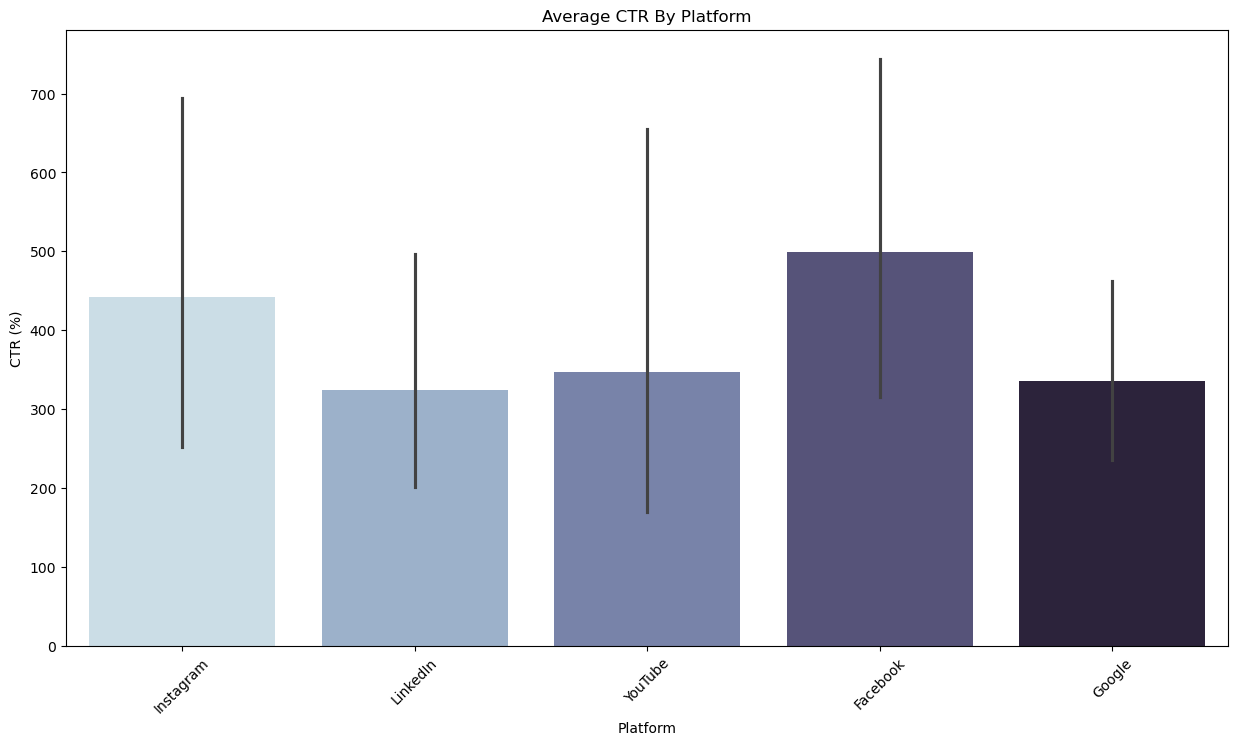

In [38]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Platform', y='CTR', data=df, estimator=np.mean, palette='ch:s=.25,rot=-.25')
plt.title('Average CTR By Platform')
plt.xlabel('Platform')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)
plt.show()

### 2. Click-Through-Rate By Target Age Group

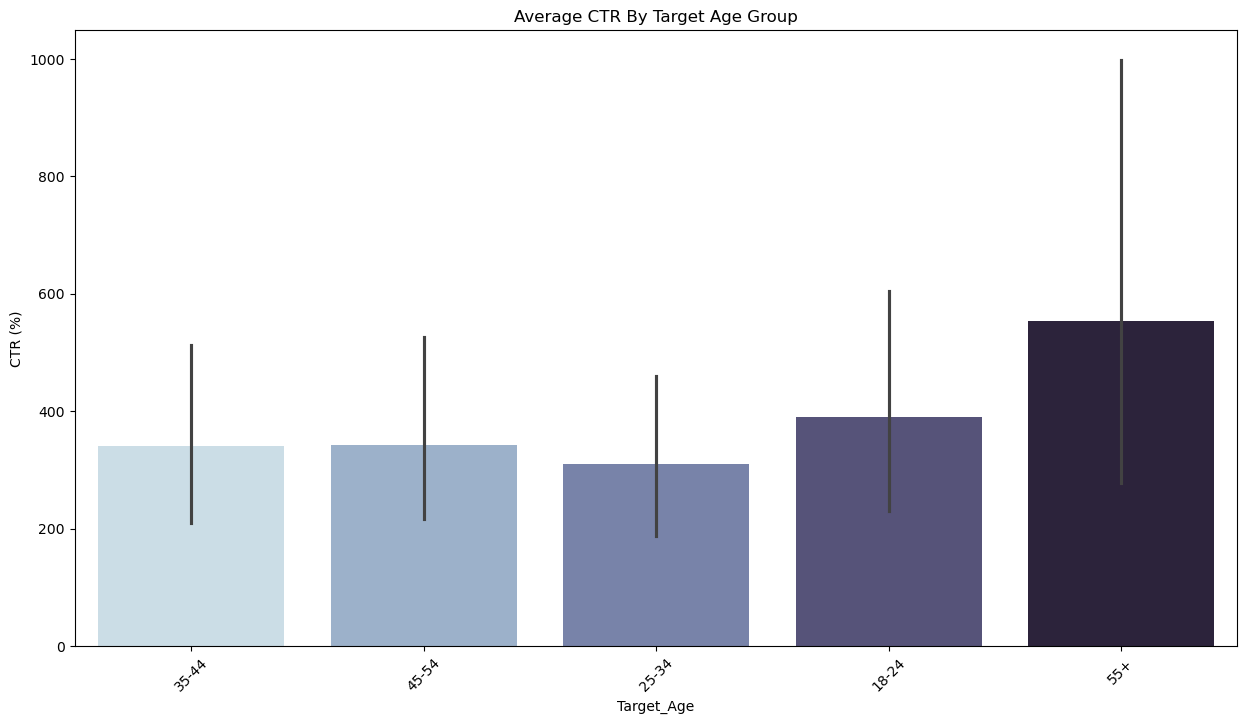

In [69]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Target_Age', y='CTR', data=df, estimator=np.mean, palette='ch:s=.25,rot=-.25')
plt.title('Average CTR By Target Age Group')
plt.xlabel('Target_Age')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)
plt.show()

### 3. Conversion Rate By Content Type

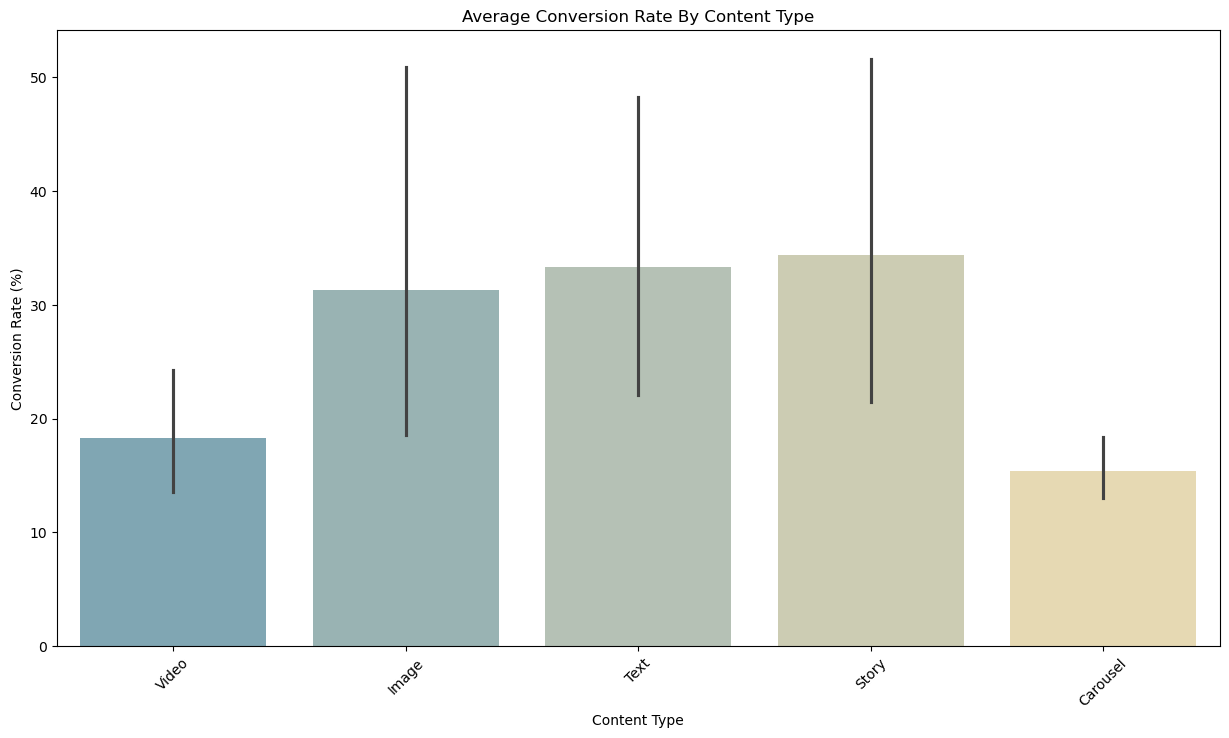

In [62]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Content_Type', y='Conversion_Rate', data=df, estimator=np.mean, palette='blend:#7AB,#EDA')
plt.title('Average Conversion Rate By Content Type')
plt.xlabel('Content Type')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.show()

### 4. Budget vs. Conversion Rate

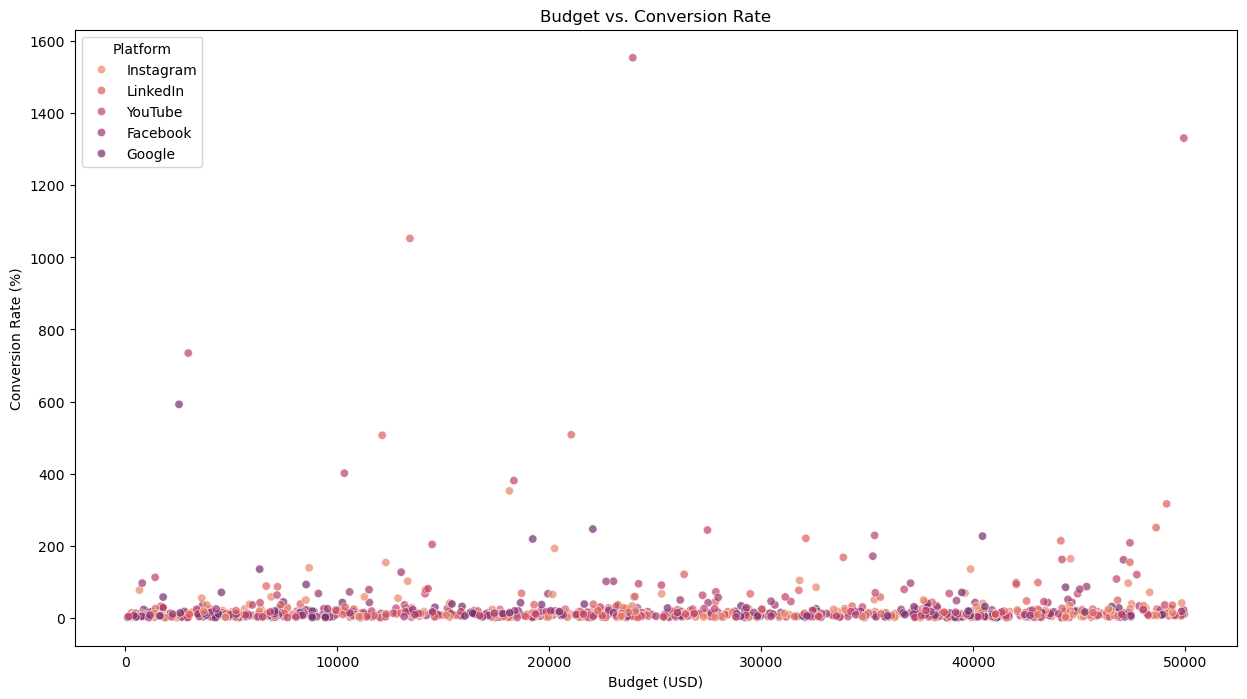

In [47]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Budget', y='Conversion_Rate', data=df, hue='Platform', alpha=0.7, palette='flare')
plt.title('Budget vs. Conversion Rate')
plt.xlabel('Budget (USD)')
plt.ylabel('Conversion Rate (%)')
plt.legend(title='Platform')
plt.show()

### 5. Success Rate By Content Type

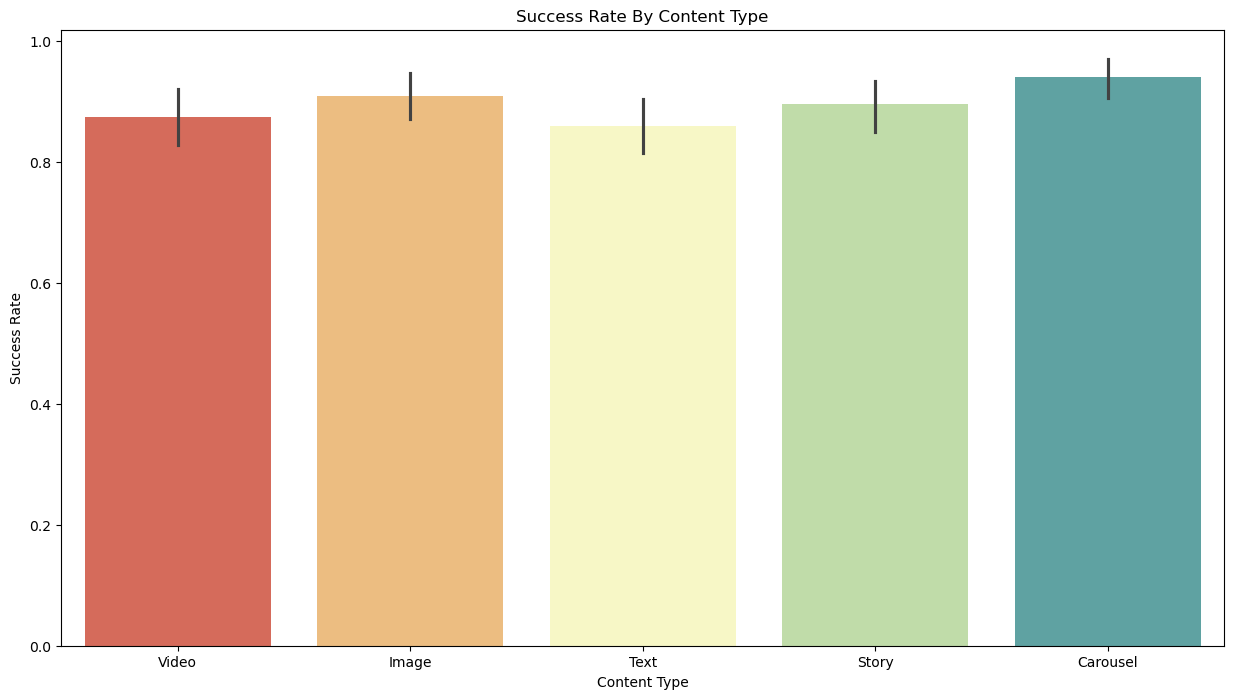

In [73]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Content_Type', y='Success', data=df, estimator=np.mean, palette='Spectral')
plt.title('Success Rate By Content Type')
plt.xlabel('Content Type')
plt.ylabel('Success Rate')
plt.show()

### 6. Success Rate By Target Age Group

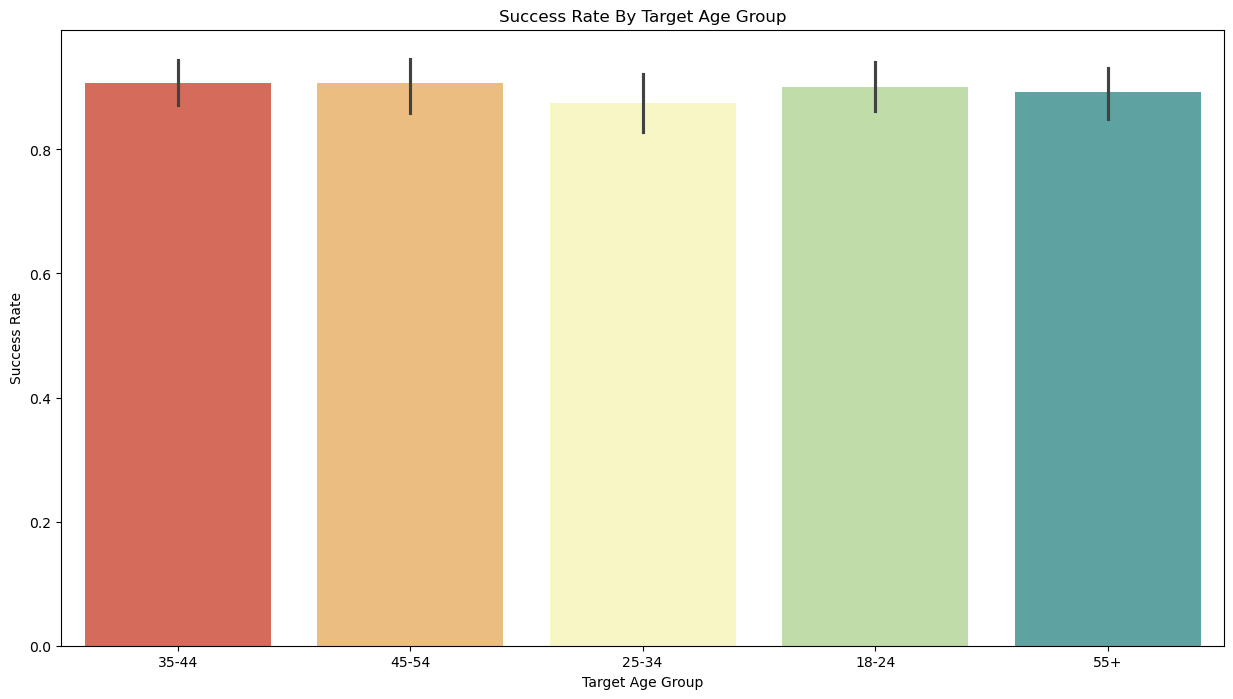

In [50]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Target_Age', y='Success', data=df, estimator=np.mean, palette='Spectral')
plt.title('Success Rate By Target Age Group')
plt.xlabel('Target Age Group')
plt.ylabel('Success Rate')
plt.show()

### 7. Cost Per Click By Platform

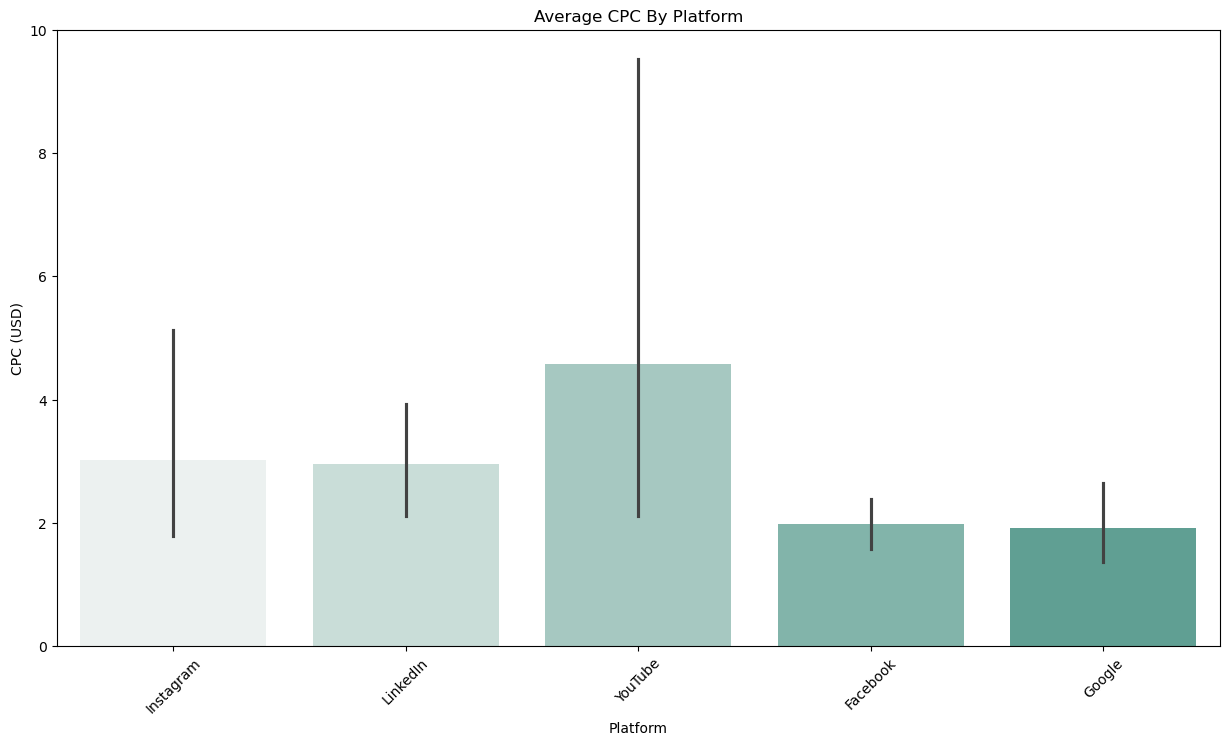

In [55]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Platform', y='CPC', data=df, estimator=np.mean, palette='light:#5A9')
plt.title('Average CPC By Platform')
plt.xlabel('Platform')
plt.ylabel('CPC (USD)')
plt.xticks(rotation=45)
plt.show()

### 8. Distribution Of Conversions By Platform

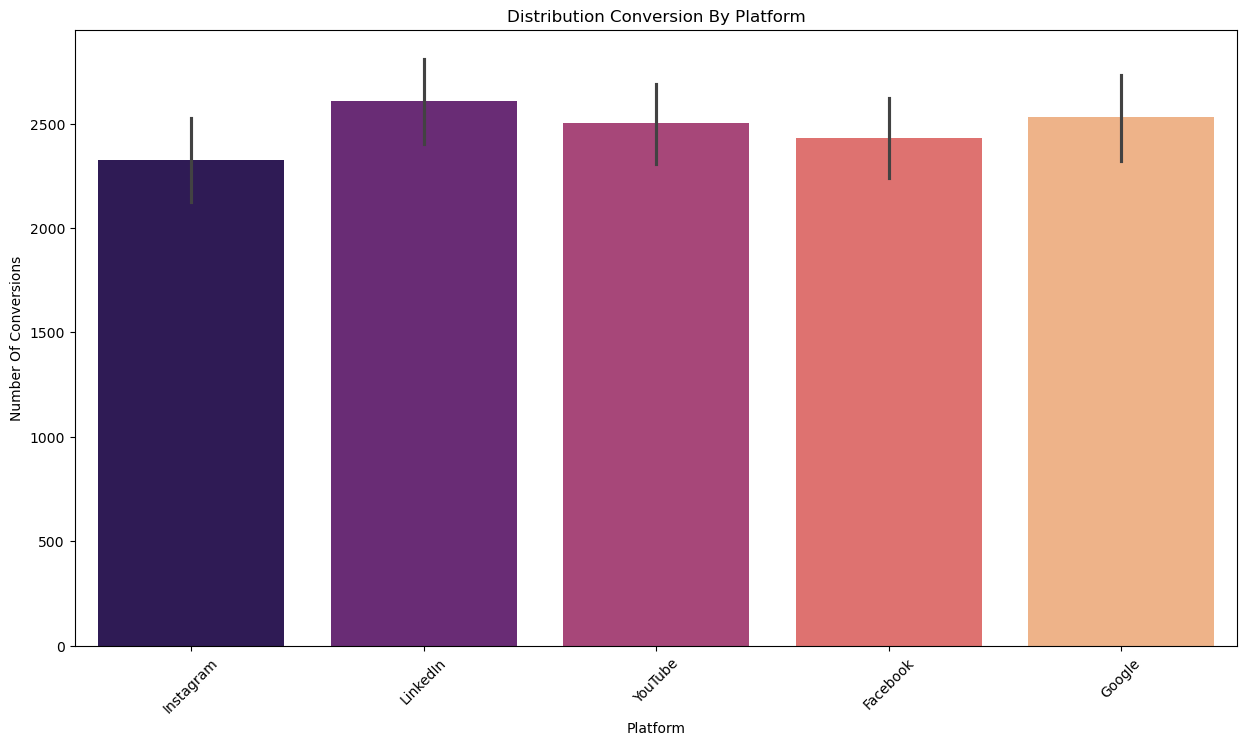

In [58]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Platform', y='Conversions', data=df, estimator=np.mean, palette='magma')
plt.title('Distribution Conversion By Platform')
plt.xlabel('Platform')
plt.ylabel('Number Of Conversions')
plt.xticks(rotation=45)
plt.show()

### 9. Budget Distribution for Successful vs. Unsuccessful Campaigns

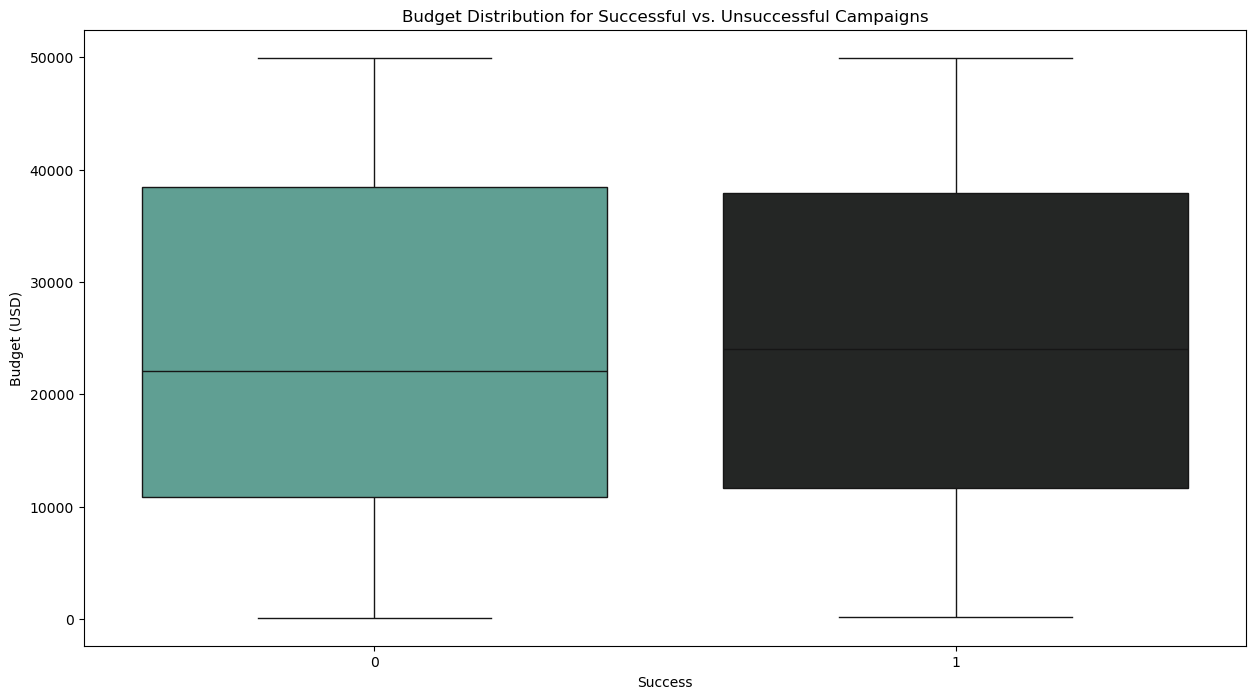

In [94]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Success', y='Budget', data=df, palette='dark:#5A9_r')
plt.title('Budget Distribution for Successful vs. Unsuccessful Campaigns')
plt.xlabel('Success')
plt.ylabel('Budget (USD)')
plt.show()

### 10. Correlation Matrix

In [134]:
val = {'Platform': {'Instagram': 1, 'LinkedIn': 2, 'YouTube': 3, 'Facebook': 4, 'Google': 5}, 
       'Content_Type': {'Video': 1, 'Image': 2, 'Text': 3, 'Story': 4, 'Carousel': 5}, 
       'Target_Gender': {'Female': 1, 'All': 2, 'Male': 3},
      'Region': {'US': 1, 'UK': 2, 'Germany': 3, 'India': 4, 'Canada': 5}}
df.replace(val, inplace=True)
df

,Campaign_ID,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
0,CAMP-XAJI0Y,15895,39,1,1,35-44,1,1,48297,2116,303.850267,0.329109,4.381225,1
1,CAMP-6DPBHS,960,8,2,1,45-54,1,2,15097,2340,1572.604167,0.063589,15.499768,1
2,CAMP-AHXTHV,38258,54,3,2,35-44,2,1,8134,2740,21.260913,4.703467,33.685763,1
3,CAMP-3A3ZMF,44832,28,4,3,25-34,1,1,21801,4277,48.628212,2.056419,19.618366,1
4,CAMP-8MDD4V,11384,36,5,4,18-24,2,2,16503,1488,144.966620,0.689814,9.016542,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CAMP-4RX6PR,15828,13,3,5,18-24,2,1,20836,3524,131.640131,0.759647,16.913035,1
996,CAMP-YIEJ9C,23375,60,1,4,55+,3,4,44615,1764,190.866310,0.523927,3.953827,1
997,CAMP-0UU5WR,6838,25,3,4,35-44,1,2,20233,3292,295.890611,0.337963,16.270449,1
998,CAMP-YESU4F,16013,28,5,2,55+,2,4,49820,2489,311.122213,0.321417,4.995986,1


In [146]:
df.drop(columns=['Target_Age'], inplace=True)
df

,Budget,Duration,Platform,Content_Type,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
0,15895,39,1,1,1,1,48297,2116,303.850267,0.329109,4.381225,1
1,960,8,2,1,1,2,15097,2340,1572.604167,0.063589,15.499768,1
2,38258,54,3,2,2,1,8134,2740,21.260913,4.703467,33.685763,1
3,44832,28,4,3,1,1,21801,4277,48.628212,2.056419,19.618366,1
4,11384,36,5,4,2,2,16503,1488,144.966620,0.689814,9.016542,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,15828,13,3,5,2,1,20836,3524,131.640131,0.759647,16.913035,1
996,23375,60,1,4,3,4,44615,1764,190.866310,0.523927,3.953827,1
997,6838,25,3,4,1,2,20233,3292,295.890611,0.337963,16.270449,1
998,16013,28,5,2,2,4,49820,2489,311.122213,0.321417,4.995986,1


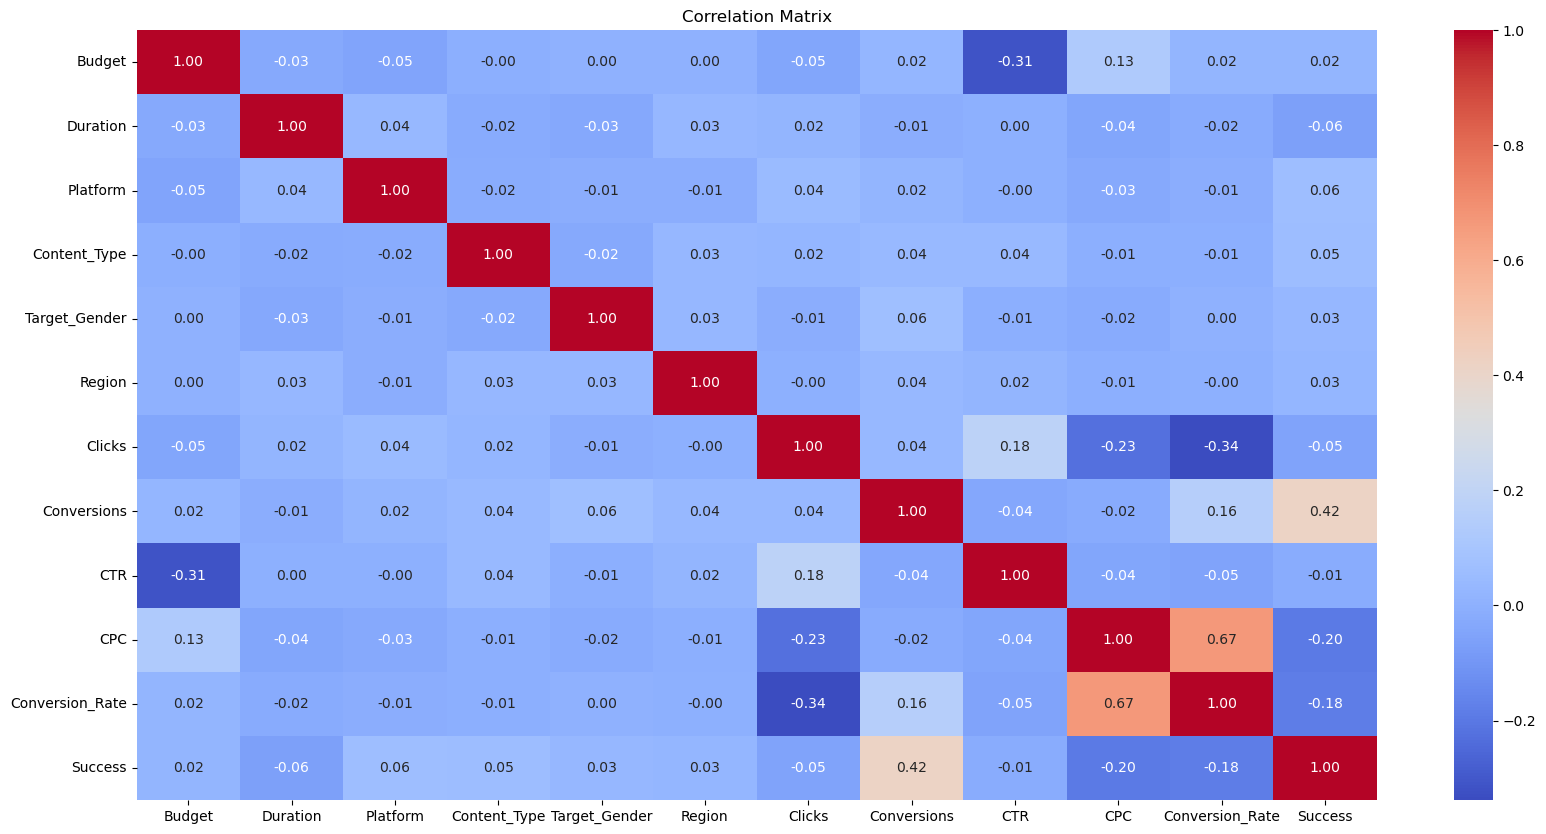

In [148]:
correlation = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Predictive Modeling

In [153]:
feaures = ['Budget', 'Duration', 'Clicks', 'Conversions', 'CTR', 'CPC', 'Conversion_Rate']
target = 'Success'

In [155]:
X = df[feaures]
y = df[target]

In [161]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

### 1. Train Test Split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(1435, 7) (359, 7)


### 2. Models To Evaluate

In [184]:
models = {'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
          'Random Forest': RandomForestClassifier(random_state=42),
          'Gradient Boosting': GradientBoostingClassifier(random_state=42)
         }

best_model = None
best_accuracy = 0
best_model_name = ''

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n{name} Accuracy: {accuracy}')


Logistic Regression Accuracy: 0.9916434540389972

Random Forest Accuracy: 0.9972144846796658

Gradient Boosting Accuracy: 0.9972144846796658


In [186]:
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = model
    best_model_name = name
    print(f'\n Best Model: {best_model_name} with Accuracy: {best_accuracy}')


 Best Model: Gradient Boosting with Accuracy: 0.9972144846796658


In [188]:
y_pred_best = best_model.predict(X_test)
print(f'\n Classification Report: \n', classification_report (y_test, y_pred_best))


 Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       187
           1       0.99      1.00      1.00       172

    accuracy                           1.00       359
   macro avg       1.00      1.00      1.00       359
weighted avg       1.00      1.00      1.00       359



### 3. Confusion Matrix

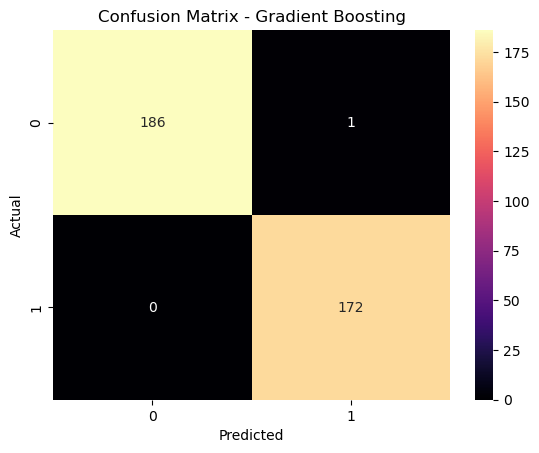

In [197]:
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()